In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv('tennis/atp_data.csv')

In [3]:
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


In [4]:
# 1ères informations de notre jeu de données

print(df.info())
print("Taille du DataFrame", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44708 entries, 0 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATP         44708 non-null  int64  
 1   Location    44708 non-null  object 
 2   Tournament  44708 non-null  object 
 3   Date        44708 non-null  object 
 4   Series      44708 non-null  object 
 5   Court       44708 non-null  object 
 6   Surface     44708 non-null  object 
 7   Round       44708 non-null  object 
 8   Best of     44708 non-null  int64  
 9   Winner      44708 non-null  object 
 10  Loser       44708 non-null  object 
 11  WRank       44708 non-null  int64  
 12  LRank       44708 non-null  int64  
 13  Wsets       44521 non-null  float64
 14  Lsets       44521 non-null  float64
 15  Comment     44708 non-null  object 
 16  PSW         32743 non-null  float64
 17  PSL         32743 non-null  float64
 18  B365W       39037 non-null  float64
 19  B365L       39057 non-nul

In [5]:
# statistiques sur les variables quantitatives
df.describe(exclude=['O'])

,ATP,Best of,WRank,LRank,Wsets,Lsets,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
count,44708.000000,44708.000000,44708.000000,44708.000000,44521.000000,44521.000000,32743.000000,32743.000000,39037.000000,39057.000000,44708.000000,44708.000000,44708.000000
mean,32.803659,3.372596,59.159681,93.674108,2.140630,0.406325,1.927563,4.240179,1.822246,3.551007,1684.023280,1608.755552,0.585594
std,18.170565,0.778702,74.881003,124.987643,0.462388,0.557349,1.359136,5.744329,1.107547,3.498689,179.246422,137.949299,0.198732
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.010000,1.000000,1.002000,1318.945207,1327.551888,0.008899
25%,19.000000,3.000000,17.000000,35.000000,2.000000,0.000000,1.270000,1.794000,1.220000,1.720000,1548.476977,1501.546103,0.447921
50%,32.000000,3.000000,41.000000,65.000000,2.000000,0.000000,1.549000,2.660000,1.500000,2.500000,1652.866073,1580.743828,0.589218
75%,49.000000,3.000000,77.000000,105.000000,2.000000,1.000000,2.140000,4.270000,2.000000,4.000000,1780.755524,1684.607134,0.737288
max,69.000000,5.000000,2000.000000,2000.000000,3.000000,2.000000,46.000000,121.000000,29.000000,101.000000,2392.408923,2392.595567,0.995601


In [6]:
# statistiques sur les variables qualitatives
df.describe(include=['O'])

,Location,Tournament,Date,Series,Court,Surface,Round,Winner,Loser,Comment
count,44708,44708,44708,44708,44708,44708,44708,44708,44708,44708
unique,115,207,4104,8,2,4,8,899,1400,4
top,Paris,Australian Open,2000-01-17,International,Outdoor,Hard,1st Round,Federer R.,Lopez F.,Completed
freq,2784,2159,127,10792,36532,23799,20728,970,369,43015


In [7]:
# Analyse variable ATP
display(df['ATP'].value_counts(normalize=True)[:20])
ATP_unique = df['ATP'].unique()
display(ATP_unique)
print(len(ATP_unique))
print(df['ATP'].isna().sum())


6     0.048291
20    0.032567
19    0.031851
31    0.029972
51    0.029614
36    0.028272
33    0.022188
49    0.021383
50    0.019952
37    0.019683
29    0.019504
23    0.019504
24    0.019146
32    0.017804
52    0.017447
48    0.017268
47    0.016820
30    0.015836
28    0.015747
39    0.015120
Name: ATP, dtype: float64

array([ 1,  3,  2,  5,  4,  6,  9,  8,  7, 11, 10, 13, 12, 16, 15, 14, 18,
       17, 19, 20, 22, 23, 21, 24, 25, 28, 27, 26, 29, 30, 31, 32, 34, 33,
       36, 35, 37, 39, 40, 38, 42, 43, 41, 46, 45, 44, 47, 48, 50, 49, 51,
       52, 54, 53, 55, 56, 58, 57, 60, 59, 62, 61, 63, 65, 64, 66, 68, 67,
       69], dtype=int64)

69
0


In [8]:
df.corr()

,ATP,Best of,WRank,LRank,Wsets,Lsets,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
ATP,1.000000,-0.046387,-0.008965,-0.016897,-0.043327,-0.001104,0.010970,-0.019625,0.012286,-0.029850,0.047014,0.074960,-0.008273
Best of,-0.046387,1.000000,-0.066836,-0.020708,0.818574,0.231996,-0.028799,0.213841,-0.033153,0.220608,0.118747,0.003619,0.105426
WRank,-0.008965,-0.066836,1.000000,0.109713,-0.070822,0.039472,0.279636,-0.226377,0.307362,-0.266269,-0.498217,-0.170002,-0.379164
LRank,-0.016897,-0.020708,0.109713,1.000000,-0.003649,-0.053960,-0.190789,0.150884,-0.208825,0.185399,-0.156366,-0.388834,0.157354
Wsets,-0.043327,0.818574,-0.070822,-0.003649,1.000000,0.225547,-0.056107,0.194150,-0.059774,0.203297,0.119892,-0.012988,0.123047
Lsets,-0.001104,0.231996,0.039472,-0.053960,0.225547,1.000000,0.113068,-0.107632,0.120241,-0.118149,-0.065344,0.066541,-0.113640
PSW,0.010970,-0.028799,0.279636,-0.190789,-0.056107,0.113068,1.000000,-0.273308,0.975043,-0.333448,-0.309118,0.397112,-0.612286
PSL,-0.019625,0.213841,-0.226377,0.150884,0.194150,-0.107632,-0.273308,1.000000,-0.297240,0.893226,0.504034,-0.158542,0.507427
B365W,0.012286,-0.033153,0.307362,-0.208825,-0.059774,0.120241,0.975043,-0.297240,1.000000,-0.371729,-0.335506,0.418323,-0.663752
B365L,-0.029850,0.220608,-0.266269,0.185399,0.203297,-0.118149,-0.333448,0.893226,-0.371729,1.000000,0.563668,-0.175170,0.595157


In [9]:
# Analyse variable lOCATION
display(df['Location'].value_counts(normalize=True))
location_unique = df['Location'].unique()
display(location_unique)
print(len(location_unique))
print(df['Location'].isna().sum())


Paris         0.062271
London        0.048828
Melbourne     0.048291
New York      0.046054
Miami         0.033998
                ...   
Dusseldorf    0.000604
Budapest      0.000604
Antalya       0.000604
Pune          0.000604
Lisbon        0.000336
Name: Location, Length: 115, dtype: float64

array(['Adelaide', 'Doha', 'Chennai', 'Sydney', 'Auckland', 'Melbourne',
       'San Jose', 'Marseille', 'Dubai', 'Rotterdam', 'Memphis',
       'Mexico City', 'London', 'Santiago', 'Delray Beach', 'Copenhagen',
       'Scottsdale', 'Bogota', 'Indian Wells', 'Miami', 'Casablanca',
       'Estoril', 'Atlanta', 'Monte Carlo', 'Barcelona', 'Orlando',
       'Munich', 'Mallorca', 'Rome', 'Hamburg', 'St. Polten', 'Paris',
       'Queens Club', 'Halle', "'s-Hertogenbosch", 'Nottingham', 'Gstaad',
       'Newport', 'Bastad', 'Stuttgart', 'Umag', 'Amsterdam',
       'San Marino', 'Los Angeles', 'Kitzbuhel', 'Toronto', 'Cincinnati',
       'Washington', 'Indianapolis', 'Long Island', 'New York',
       'Tashkent', 'Bucharest', 'Palermo', 'Hong Kong', 'Vienna', 'Tokyo',
       'Toulouse', 'Shanghai', 'Moscow', 'Basel', 'St. Petersburg',
       'Lyon', 'Stockholm', 'Brighton', 'Lisbon', 'Milan', 'Vina del Mar',
       'Buenos Aires', 'Acapulco', 'Houston', 'Amersfoort', 'Sopot',
       'Salvador'

115
0


In [10]:
# Analyse variable Tournament
display(df['Tournament'].value_counts(normalize=True))
tournament_unique = df['Tournament'].unique()
display(tournament_unique)
print(len(tournament_unique))
print(df['Tournament'].isna().sum())

Australian Open           0.048291
US Open                   0.045450
French Open               0.045450
Wimbledon                 0.045450
Sony Ericsson Open        0.021249
                            ...   
LA Tennis Open            0.000604
Gazprom Hungarian Open    0.000604
Power Horse Cup           0.000604
Portugal Open             0.000604
New York Open             0.000604
Name: Tournament, Length: 207, dtype: float64

array(['Australian Hardcourt Championships', 'Qatar Open',
       'Gold Flake Open', 'Sydney International', 'Heineken Open',
       'Australian Open', 'Sybase Open', 'Marseille Open', 'Dubai Open',
       'ABN AMRO World Tennis Tournament', 'Kroger St. Jude',
       'Mexican Open', 'AXA Cup', 'Chevrolet Cup',
       'Citrix Tennis Championships', 'Copenhagen Open',
       'Franklin Templeton Tennis Classic', 'Colombia Open',
       'Indian Wells TMS', 'Ericsson Open', 'Grand Prix Hassan II',
       'Estoril Open', 'Galleryfurniture.com Tennis Challenge',
       'Monte Carlo Masters', 'Open Seat Godo',
       'U.S. Clay Court Championships', 'BMW Open', 'Mallorca Open',
       'Rome TMS', 'Hamburg TMS', 'Internationaler Raiffeisen Grand Prix',
       'French Open', 'Stella Artois', 'Gerry Weber Open',
       'Heineken Trophy', 'Nottingham Open', 'Wimbledon', 'Gstaad Open',
       'Hall of Fame Championships', 'Swedish Open', 'Mercedes Cup',
       'Croatia Open', 'Dutch Open', "Tennis 

207
0


In [11]:
# Analyse variable Date
display(df['Date'].value_counts(normalize=True))
date_unique = df['Date'].unique()
display(date_unique)
print(len(date_unique))
print(df['Date'].isna().sum())

2000-01-17    0.002841
2000-06-26    0.002841
2000-08-28    0.002841
2002-06-24    0.002841
2002-05-27    0.002841
                ...   
2015-09-11    0.000022
2015-09-12    0.000022
2015-09-13    0.000022
2011-04-03    0.000022
2013-11-11    0.000022
Name: Date, Length: 4104, dtype: float64

array(['2000-01-03', '2000-01-10', '2000-01-17', ..., '2018-03-02',
       '2018-03-03', '2018-03-04'], dtype=object)

4104
0


In [12]:
date = pd.to_datetime(df['Date'])

In [13]:
date.describe()

D:\TEMP\ipykernel_13876\489397822.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  date.describe()


count                   44708
unique                   4104
top       2000-01-17 00:00:00
freq                      127
first     2000-01-03 00:00:00
last      2018-03-04 00:00:00
Name: Date, dtype: object

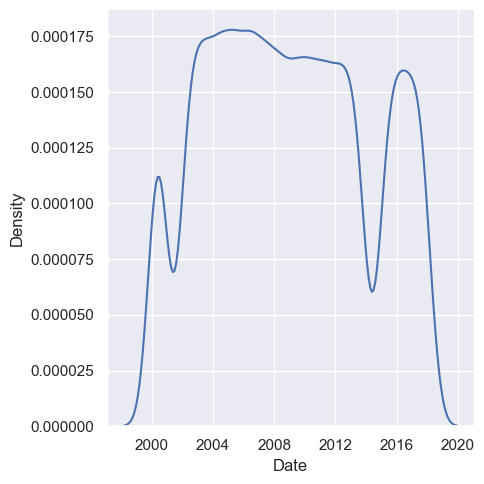

In [14]:
sns.displot(date, kind='kde')

In [15]:
date.dt.year.value_counts().sort_index()

2000    2963
2001      93
2002    2806
2003    2816
2004    2877
2005    2910
2006    2908
2007    2824
2008    2689
2009    2731
2010    2679
2011    2675
2012    2683
2013    2555
2015    2630
2016    2626
2017    2635
2018     608
Name: Date, dtype: int64

In [16]:
# Analyse variable Series
display(df['Series'].value_counts(normalize=True))
series_unique = df['Series'].unique()
display(series_unique)
print(len(series_unique))
print(df['Series'].isna().sum())

International         0.241389
ATP250                0.213608
Grand Slam            0.184643
Masters               0.103248
Masters 1000          0.101279
ATP500                0.076787
International Gold    0.073678
Masters Cup           0.005368
Name: Series, dtype: float64

array(['International', 'Grand Slam', 'International Gold', 'Masters',
       'Masters Cup', 'ATP250', 'ATP500', 'Masters 1000'], dtype=object)

8
0


In [17]:
# Analyse variable Court
display(df['Court'].value_counts(normalize=True))
court_unique = df['Court'].unique()
display(court_unique)
print(len(court_unique))
print(df['Court'].isna().sum())

Outdoor    0.817124
Indoor     0.182876
Name: Court, dtype: float64

array(['Outdoor', 'Indoor'], dtype=object)

2
0


In [18]:
# Analyse variable Surface
display(df['Surface'].value_counts(normalize=True))
surface_unique = df['Surface'].unique()
display(surface_unique)
print(len(surface_unique))
print(df['Surface'].isna().sum())

Hard      0.532321
Clay      0.323656
Grass     0.109958
Carpet    0.034065
Name: Surface, dtype: float64

array(['Hard', 'Clay', 'Grass', 'Carpet'], dtype=object)

4
0


In [19]:
# Analyse variable Round
display(df['Round'].value_counts(normalize=True))
round_unique = df['Round'].unique()
display(round_unique)
print(len(round_unique))
print(df['Round'].isna().sum())

1st Round        0.463631
2nd Round        0.275566
Quarterfinals    0.094838
3rd Round        0.069965
Semifinals       0.048135
The Final        0.024067
4th Round        0.016820
Round Robin      0.006979
Name: Round, dtype: float64

array(['1st Round', 'Semifinals', 'Quarterfinals', '2nd Round',
       'The Final', '3rd Round', '4th Round', 'Round Robin'], dtype=object)

8
0


In [20]:
# Analyse variable Best of
display(df['Best of'].value_counts(normalize=True))
bestof_unique = df['Best of'].unique()
display(bestof_unique)
print(len(bestof_unique))
print(df['Best of'].isna().sum())

3    0.813702
5    0.186298
Name: Best of, dtype: float64

array([3, 5], dtype=int64)

2
0


In [21]:
# Analyse variable Winner
display(df['Winner'].value_counts(normalize=True))
winner_unique = df['Winner'].unique()
display(winner_unique)
print(len(winner_unique))
print(df['Winner'].isna().sum())

Federer R.        0.021696
Nadal R.          0.017961
Djokovic N.       0.015366
Ferrer D.         0.014136
Murray A.         0.012526
                    ...   
Cruciat A.        0.000022
De Heart R.       0.000022
Jun W.S.          0.000022
Qureshi A.U.H.    0.000022
Clezar G.         0.000022
Name: Winner, Length: 899, dtype: float64

array(['Dosedel S.', 'Kiefer N.', 'Gaudio G.', 'El Aynaoui Y.',
       'Cherkasov A.', 'Caratti C.', 'Berasategui A.', 'Bastl G.',
       'Hantschk M.', 'Golmard J.', 'Pioline C.', 'Damm M.',
       'Sanguinetti D.', 'Manta L.', 'Ketola T.', 'Marin J.A.',
       'Mirnyi M.', 'Santoro F.', 'Schalken S.', 'Schuettler R.',
       'Tillstrom M.', 'Delgado J.', 'van Lottum J.', 'Vacek D.',
       'Squillari F.', 'Vanek J.', 'Hewitt L.', 'Henman T.',
       'Grosjean S.', 'Escude N.', 'Enqvist T.', 'Vinck C.',
       'Stoltenberg J.', 'Sekulov J.', 'Petrovic D.', 'Martin A.',
       'Norman M.', 'Lisnard J.', 'Vinciguerra A.', 'Gambill J.M.',
       'Fromberg R.', 'Federer R.', 'Tabara M.', 'Stanoytchev O.',
       'Jonsson F.', 'Paes L.', 'Behrend T.', 'Agenor R.', 'Martin T.',
       'Ljubicic I.', 'Lapentti N.', 'Kucera K.', 'Koubek S.',
       'Hrbaty D.', 'Corretja A.', 'Clement A.', 'Ilie A.', 'Voinea A.',
       'Clavet F.', 'Arazi H.', 'Chang M.', 'Ferrero J.C.',
       'Gustafsson M

899
0


In [22]:
# Analyse variable Loser
display(df['Loser'].value_counts(normalize=True))
loser_unique = df['Loser'].unique()
display(loser_unique)
print(len(loser_unique))
print(df['Loser'].isna().sum())

Lopez F.           0.008254
Youzhny M.         0.007717
Verdasco F.        0.007583
Ferrer D.          0.007269
Nieminen J.        0.006889
                     ...   
Lejnieks K.        0.000022
Ebelthite C.       0.000022
Anderson A.        0.000022
Hutchins R.        0.000022
Seyboth Wild T.    0.000022
Name: Loser, Length: 1400, dtype: float64

array(['Ljubicic I.', 'Tarango J.', 'Luxa P.', ..., 'Auger-Aliassime F.',
       'Gaston H.', 'Seyboth Wild T.'], dtype=object)

1400
0


In [23]:
# Analyse variable WRank
display(df['WRank'].value_counts(normalize=True))
wrank_unique = df['WRank'].unique()
display(wrank_unique)
print(len(wrank_unique))
print(df['WRank'].isna().sum())

1       0.022524
2       0.020667
3       0.018654
5       0.017872
4       0.017536
          ...   
503     0.000022
428     0.000022
481     0.000022
1554    0.000022
1821    0.000022
Name: WRank, Length: 587, dtype: float64

array([  63,    6,   73,   33,  206,  211,   60,   85,  128,   38,   14,
        104,  121,  117,  163,   71,   74,   32,   44,   47,   83,  162,
         69,   39,   49,  160,   24,   11,   26,   40,    5,  227,   84,
        142,  208,   55,   15,  134,   99,   58,   81,   65,  125,  111,
        127,  145,  116,   94,    8,   79,    7,   17,   23,   21,   28,
         41,  102,   42,   66,  115,   50,   45,   57,   72,   43,   48,
         46,   37,  167,   67,    4,   95,  120,    3,    2,   19,   62,
         13,   80,   53,   34,   29,   64,   54,  151,   76,   56,   35,
          1,   30,  123,   70,  238,   12,   10,   98,  106,  263,  126,
        204,  153,  182,   89,  472,  166,  133,    9,  137,   82,   91,
         77,   20,  147,  188,   97,  143,   18,   61,   52,   25,   27,
         78,  203,  114,   87,   51,  280,  118,  110,  112,  105,   96,
        113,  596,  131,  135,  419,  175,  109,   16,  103,  129,  243,
        107,  422,  138,   88,  178,  100,  220,  1

587
0


In [24]:
# Analyse variable LRank
display(df['LRank'].value_counts(normalize=True))
lrank_unique = df['LRank'].unique()
display(lrank_unique)
print(len(lrank_unique))
print(df['LRank'].isna().sum())

46     0.008790
35     0.008634
50     0.008567
45     0.008522
44     0.008500
         ...   
735    0.000022
638    0.000022
948    0.000022
827    0.000022
828    0.000022
Name: LRank, Length: 920, dtype: float64

array([  77,   59,  174,   78,   35,  219, 2000,   36,   14,  104,  121,
        163,  162,  117,   99,  145,  125,  160,  116,  127,   25,  101,
        138,   86,   47,   33,    6,   74,   85,   44,   83,  206,   39,
        111,   49,   71,  211,   73,   60,   76,   50,   62,   93,  285,
         69,   94,  128,  238,  208,  134,   58,   63,   65,   88,   20,
         79,  122,  142,  155,  351,  113,  218,   51,  105,  198,   87,
        655,   56,   21,   81,  129,   26,  227,    2,  342,  100,  414,
        115,  135,  103,   89,  200,  137,  120,  124, 1198,    5,   40,
         15,   55,   84,   67,   11,   24,   31,   29,  193,   27,   32,
         18,   17,    8,   23,   41,  102,    7,   28,   42,   72,   95,
         70,   61,   80,   52,  246,  334,  149,   53,   68,   45,  167,
         48,   38,   43,   57,   66,   34,   37,   46,   98,  123,  106,
        472,   82,   91,  182,  126,    9,  166,   10,   12,  153,  133,
         30,  204,  151,  263,    3,    4,   13,   

920
0


In [25]:
# Analyse variable Wsets
display(df['Wsets'].value_counts(normalize=True))
wsets_unique = df['Wsets'].unique()
display(wsets_unique)
print(len(wsets_unique))
print(df['Wsets'].isna().sum())

# taux de nan
print(df['Wsets'].isna().sum()/len(df['Wsets']))

2.0    0.791424
3.0    0.178770
1.0    0.021473
0.0    0.008333
Name: Wsets, dtype: float64

array([ 2.,  1.,  3.,  0., nan])

5
187
0.004182696609107989


In [26]:
df[df['Wsets'].isna()]

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
6520,19,Indian Wells,Pacific Life Open,2003-03-13,Masters,Outdoor,Hard,2nd Round,3,Ginepri R.,...,NaN,NaN,Walkover,NaN,NaN,3.500,1.286,1559.874972,1711.173780,0.295058
6621,20,Miami,NASDAQ-100 Open,2003-03-26,Masters,Outdoor,Hard,4th Round,3,Srichaphan P.,...,NaN,NaN,Walkover,NaN,NaN,2.000,1.727,1722.446418,1732.162945,0.486020
7719,43,Kitzbuhel,Generali Open,2003-07-24,International Gold,Outdoor,Clay,3rd Round,3,Zabaleta M.,...,NaN,NaN,Walkover,NaN,NaN,1.667,2.100,1689.874748,1620.239101,0.598893
8281,55,Palermo,Campionati Internazionali Di Sicilia,2003-09-25,International,Outdoor,Clay,2nd Round,3,Squillari F.,...,NaN,NaN,Walkover,NaN,NaN,2.750,1.400,1518.527470,1626.123106,0.349925
8451,61,Vienna,CA Tennis Trophy,2003-10-09,International Gold,Indoor,Hard,2nd Round,3,Mirnyi M.,...,NaN,NaN,Walkover,NaN,NaN,1.500,2.500,1678.882633,1666.054955,0.518452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42579,29,Madrid,Mutua Madrid Open,2017-05-12,Masters 1000,Outdoor,Clay,Quarterfinals,3,Djokovic N.,...,NaN,NaN,Walkover,1.47,2.94,1.440,2.750,2195.073671,1943.626000,0.809606
43707,55,St. Petersburg,St. Petersburg Open,2017-09-21,ATP250,Indoor,Hard,2nd Round,3,Berankis R.,...,NaN,NaN,Walkover,4.37,1.26,4.330,1.200,1503.240372,1813.309261,0.143699
44079,66,Paris,BNP Paribas Masters,2017-11-03,Masters 1000,Indoor,Hard,Quarterfinals,3,Krajinovic F.,...,NaN,NaN,Walkover,8.91,1.10,9.000,1.070,1520.886720,2146.616534,0.026546
44170,2,Doha,Qatar Exxon Mobil Open,2018-01-05,ATP250,Outdoor,Hard,Semifinals,3,Monfils G.,...,NaN,NaN,Walkover,2.60,1.57,2.620,1.500,1818.811423,1804.480779,0.520612


In [27]:
len(df[df['Comment'] == 'Walkover'])

216

In [28]:
df[df['Comment'] == 'Walkover']['Wsets'].value_counts()

0.0    37
Name: Wsets, dtype: int64

In [29]:
# Analyse variable Lsets
display(df['Lsets'].value_counts(normalize=True))
lsets_unique = df['Lsets'].unique()
display(lsets_unique)
print(len(lsets_unique))
print(df['Lsets'].isna().sum())

# taux de nan
print(df['Lsets'].isna().sum()/len(df['Lsets']))

0.0    0.628378
1.0    0.336920
2.0    0.034703
Name: Lsets, dtype: float64

array([ 0.,  1.,  2., nan])

4
187
0.004182696609107989


In [30]:
# Analyse variable Comment
display(df['Comment'].value_counts(normalize=True))
comment_unique = df['Comment'].unique()
display(comment_unique)
print(len(comment_unique))
print(df['Comment'].isna().sum())

# taux de nan
print(df['Comment'].isna().sum()/len(df['Comment']))

Completed       0.962132
Retired         0.033014
Walkover        0.004831
Disqualified    0.000022
Name: Comment, dtype: float64

array(['Completed', 'Retired', 'Walkover', 'Disqualified'], dtype=object)

4
0
0.0


In [31]:
# Analyse variable PSW
display(df['PSW'].value_counts(normalize=True))
psw_unique = df['PSW'].unique()
display(psw_unique)
print(len(psw_unique))
print(df['PSW'].isna().sum())

# taux de nan
print(df['PSW'].isna().sum()/len(df['PSW']))

1.380    0.008613
1.130    0.007788
1.170    0.007544
1.220    0.007513
1.400    0.007299
           ...   
8.530    0.000031
6.460    0.000031
5.020    0.000031
1.207    0.000031
9.690    0.000031
Name: PSW, Length: 1177, dtype: float64

array([ nan, 2.21, 3.25, ..., 6.47, 8.91, 9.69])

1178
11965
0.26762548089827326


In [32]:
df[df['PSW'].isna()]

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44203,4,Auckland,ASB Classic,2018-01-09,ATP250,Outdoor,Hard,1st Round,3,Johnson S.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1672.947362,1500.000000,0.730186
44375,9,Sofia,Garanti Koza Sofia Open,2018-02-06,ATP250,Indoor,Hard,1st Round,3,Basic M.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1598.706875,1595.484285,0.504638
44391,9,Sofia,Garanti Koza Sofia Open,2018-02-07,ATP250,Indoor,Hard,1st Round,3,Baghdatis M.,...,2.0,0.0,Completed,NaN,NaN,1.28,3.5,1683.325148,1474.625171,0.768769
44591,14,Marseille,Open 13,2018-02-22,ATP250,Indoor,Hard,2nd Round,3,Khachanov K.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1691.174763,1608.510142,0.616769


In [33]:
df['PSW'].describe()

count    32743.000000
mean         1.927563
std          1.359136
min          1.000000
25%          1.270000
50%          1.549000
75%          2.140000
max         46.000000
Name: PSW, dtype: float64

(1.0, 10.0)

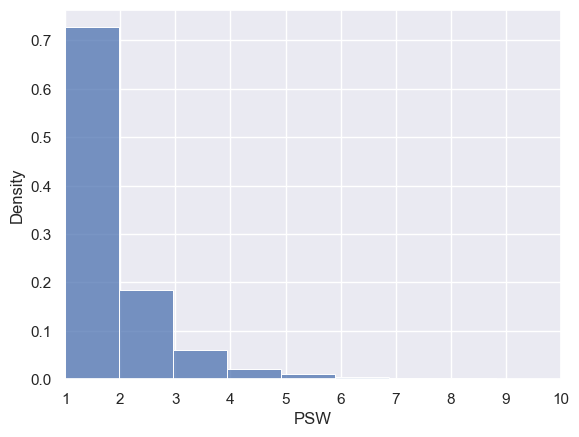

In [34]:
fig, ax = plt.subplots()
sns.histplot(df['PSW'], ax=ax, stat='density', bins=46)
ax.set_xlim(1, 10)

In [35]:
# Analyse variable PSL
display(df['PSL'].value_counts(normalize=True))
psl_unique = df['PSL'].unique()
display(psl_unique)
print(len(psl_unique))
print(df['PSL'].isna().sum())

# taux de nan
print(df['PSL'].isna().sum()/len(df['PSL']))

2.200     0.005558
3.050     0.005070
2.500     0.004245
1.690     0.004245
2.800     0.004123
            ...   
22.810    0.000031
10.880    0.000031
1.102     0.000031
1.199     0.000031
11.540    0.000031
Name: PSL, Length: 1580, dtype: float64

array([   nan,  1.719,  1.385, ..., 13.82 , 12.24 , 11.54 ])

1581
11965
0.26762548089827326


In [36]:
df['PSL'].describe()

count    32743.000000
mean         4.240179
std          5.744329
min          1.010000
25%          1.794000
50%          2.660000
75%          4.270000
max        121.000000
Name: PSL, dtype: float64

(1.0, 15.0)

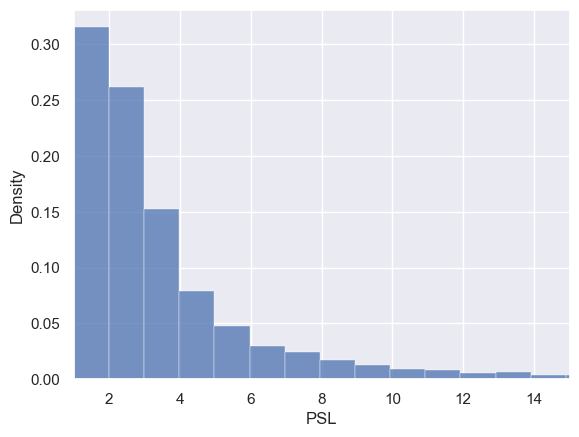

In [37]:
fig, ax = plt.subplots()
sns.histplot(df['PSL'], ax=ax, stat='density', bins=121)
ax.set_xlim(1, 15)

In [38]:
# Analyse variable B365W
display(df['B365W'].value_counts(normalize=True))
b365w_unique = df['B365W'].unique()
display(b365w_unique)
print(len(b365w_unique))
print(df['B365W'].isna().sum())

# taux de nan
print(df['B365W'].isna().sum()/len(df['B365W']))

1.400    0.035146
1.360    0.034224
1.440    0.031457
1.250    0.030561
1.500    0.029895
           ...   
1.090    0.000026
1.770    0.000026
1.003    0.000026
2.050    0.000026
1.740    0.000026
Name: B365W, Length: 133, dtype: float64

array([   nan,  2.   ,  1.571,  1.8  ,  2.2  ,  1.143,  2.625,  1.444,
        1.1  ,  1.533,  1.167,  7.   ,  1.04 ,  1.5  ,  9.   ,  2.75 ,
        2.25 ,  1.727,  3.   ,  1.364,  7.5  ,  1.333,  1.667,  2.5  ,
        1.4  ,  1.05 ,  8.   ,  1.909,  2.1  ,  1.125,  1.111,  1.222,
        3.5  ,  2.375,  1.25 ,  3.75 ,  1.615,  1.03 ,  1.286,  1.071,
        4.333,  4.   ,  1.833,  1.2  ,  3.25 ,  4.5  ,  1.083,  6.5  ,
        1.063,  5.   ,  1.3  ,  5.5  ,  2.875,  6.   ,  1.02 ,  1.118,
        1.36 ,  1.44 ,  1.28 ,  2.62 ,  1.61 ,  1.22 ,  1.72 ,  1.57 ,
        1.07 ,  2.37 ,  1.33 ,  1.08 ,  1.66 ,  1.83 ,  1.06 ,  1.53 ,
        4.33 ,  1.14 ,  1.16 ,  1.12 ,  2.87 ,  1.182,  3.4  ,  1.056,
        1.9  ,  1.11 ,  2.63 ,  1.73 ,  1.91 ,  1.67 ,  1.62 ,  2.38 ,
        1.29 ,  1.015,  1.01 ,  1.55 ,  1.19 ,  3.2  ,  3.39 ,  1.39 ,
        1.   ,  8.5  ,  1.38 ,  1.68 ,  2.79 ,  1.18 , 15.   , 12.   ,
       10.   ,  1.7  ,  2.4  , 13.   , 11.   ,  1.005,  2.15 ,  1.77 ,
      

134
5671
0.12684530732754765


In [39]:
df['B365W'].describe()

count    39037.000000
mean         1.822246
std          1.107547
min          1.000000
25%          1.220000
50%          1.500000
75%          2.000000
max         29.000000
Name: B365W, dtype: float64

(1.0, 6.0)

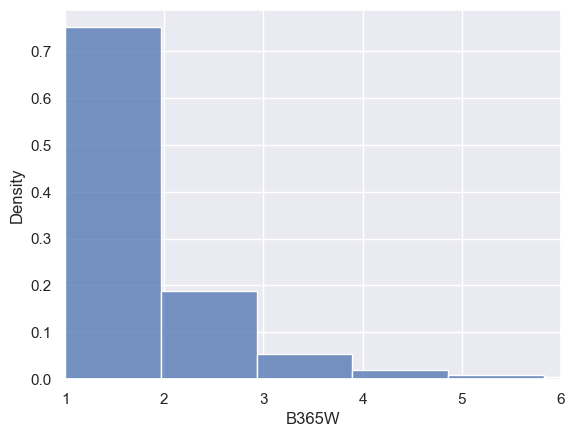

In [40]:
fig, ax = plt.subplots()
sns.histplot(df['B365W'], ax=ax, stat='density', bins=29)
ax.set_xlim(1, 6)

In [41]:
# Analyse variable B365L
display(df['B365L'].value_counts(normalize=True))
b365l_unique = df['B365L'].unique()
display(b365l_unique)
print(len(b365l_unique))
print(df['B365L'].isna().sum())

# taux de nan
print(df['B365L'].isna().sum()/len(df['B365L']))

2.75     0.042809
3.00     0.039353
4.50     0.033131
2.25     0.032337
3.50     0.031928
           ...   
3.95     0.000026
2.88     0.000026
1.41     0.000026
1.62     0.000026
10.50    0.000026
Name: B365L, Length: 137, dtype: float64

array([    nan,   1.727,   2.25 ,   1.909,   1.615,   5.   ,   1.444,
         2.625,   6.5  ,   2.375,   4.5  ,   1.083,   9.   ,   2.5  ,
         1.04 ,   1.4  ,   1.571,   2.   ,   1.364,   3.   ,   1.071,
         3.25 ,   2.1  ,   1.5  ,   2.75 ,   8.5  ,   1.063,   1.8  ,
         1.667,   5.5  ,   6.   ,   4.   ,   1.286,   1.533,   3.75 ,
         1.25 ,   2.2  ,  10.   ,   2.875,   3.5  ,   7.5  ,   1.2  ,
         1.833,   1.222,   1.333,   4.333,   1.167,   7.   ,   1.1  ,
         8.   ,   1.143,   3.4  ,   3.6  ,   1.125,   1.111,  11.   ,
         6.25 ,   1.33 ,   1.72 ,   2.62 ,   1.44 ,   1.16 ,   1.53 ,
         1.83 ,   1.36 ,   1.61 ,   1.28 ,   1.57 ,   2.37 ,   1.73 ,
         4.33 ,   2.87 ,   1.14 ,   1.66 ,   1.3  ,   1.9  ,   1.22 ,
         3.2  ,   3.8  ,   2.63 ,   2.38 ,   1.67 ,   2.88 ,   1.62 ,
        12.   ,  13.   ,   2.3  ,   1.05 ,  15.   ,   1.08 ,   3.39 ,
         1.39 ,   1.12 ,  21.   ,   1.19 ,   1.06 ,   1.07 ,   1.11 ,
        17.   ,   1.

138
5651
0.12639796009662702


In [42]:
df['B365L'].describe()

count    39057.000000
mean         3.551007
std          3.498689
min          1.002000
25%          1.720000
50%          2.500000
75%          4.000000
max        101.000000
Name: B365L, dtype: float64

(1.0, 10.0)

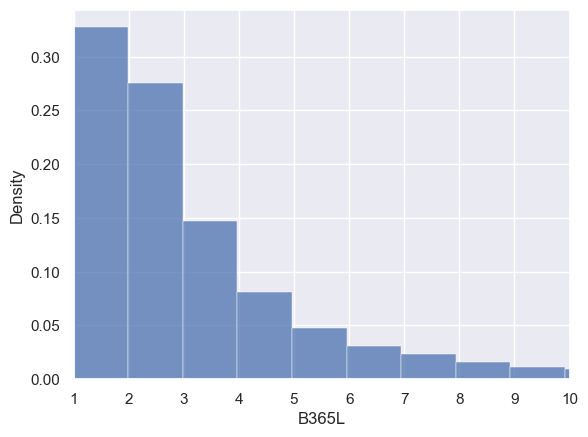

In [43]:
fig, ax = plt.subplots()
sns.histplot(df['B365L'], ax=ax, stat='density', bins=101)
ax.set_xlim(1, 10)

In [44]:
# Analyse variable elo_winner
display(df['elo_winner'].value_counts(normalize=True))
elow_unique = df['elo_winner'].unique()
display(elow_unique)
print(len(elow_unique))
print(df['elo_winner'].isna().sum())

# taux de nan
print(df['elo_winner'].isna().sum()/len(df['elo_winner']))

1500.000000    0.007381
1516.000000    0.000671
1484.000000    0.000403
1532.000000    0.000179
1484.736307    0.000134
                 ...   
1455.042716    0.000022
1467.581468    0.000022
1896.627907    0.000022
1599.880487    0.000022
1814.065865    0.000022
Name: elo_winner, Length: 44297, dtype: float64

array([1500.        , 1484.        , 1516.        , ..., 1588.29306911,
       1966.53284874, 1814.06586518])

44297
0
0.0


In [45]:
df['elo_winner'].describe()

count    44708.000000
mean      1684.023280
std        179.246422
min       1318.945207
25%       1548.476977
50%       1652.866073
75%       1780.755524
max       2392.408923
Name: elo_winner, dtype: float64

<AxesSubplot:xlabel='elo_winner', ylabel='Density'>

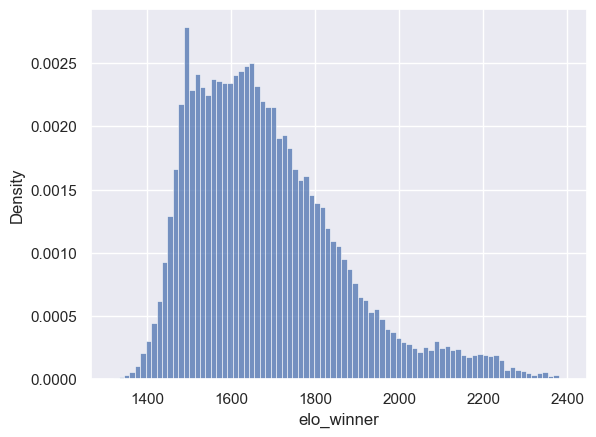

In [46]:
fig, ax = plt.subplots()
sns.histplot(df['elo_winner'], ax=ax, stat='density')


In [47]:
# Analyse variable elo_loser
display(df['elo_loser'].value_counts(normalize=True))
elol_unique = df['elo_loser'].unique()
display(elol_unique)
print(len(elol_unique))
print(df['elo_loser'].isna().sum())

# taux de nan
print(df['elo_loser'].isna().sum()/len(df['elo_loser']))

1500.000000    0.024045
1516.000000    0.001118
1484.000000    0.000514
1532.000000    0.000246
1500.736307    0.000179
                 ...   
1395.036876    0.000022
1607.887448    0.000022
1599.078663    0.000022
1526.847084    0.000022
1605.738153    0.000022
Name: elo_loser, Length: 43522, dtype: float64

array([1500.        , 1516.        , 1545.82782033, ..., 1619.75842139,
       1851.41360946, 1605.73815346])

43522
0
0.0


In [48]:
df['elo_loser'].describe()

count    44708.000000
mean      1608.755552
std        137.949299
min       1327.551888
25%       1501.546103
50%       1580.743828
75%       1684.607134
max       2392.595567
Name: elo_loser, dtype: float64

<AxesSubplot:xlabel='elo_loser', ylabel='Density'>

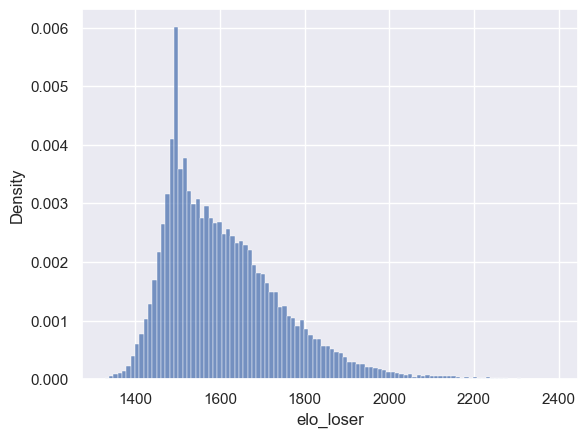

In [49]:
fig, ax = plt.subplots()
sns.histplot(df['elo_loser'], ax=ax, stat='density')

In [50]:
# Analyse variable proba_elo
display(df['proba_elo'].value_counts(normalize=True))
proba_elo_unique = df['proba_elo'].unique()
display(proba_elo_unique)
print(len(proba_elo_unique))
print(df['proba_elo'].isna().sum())

# taux de nan
print(df['proba_elo'].isna().sum()/len(df['proba_elo']))

0.500000    0.002572
0.476990    0.000336
0.523010    0.000201
0.478048    0.000089
0.501060    0.000067
              ...   
0.194301    0.000022
0.507561    0.000022
0.447806    0.000022
0.221023    0.000022
0.768388    0.000022
Name: proba_elo, Length: 44555, dtype: float64

array([0.5       , 0.47699041, 0.52300959, ..., 0.45484111, 0.65986207,
       0.7683879 ])

44555
0
0.0


In [51]:
df['proba_elo'].describe()

count    44708.000000
mean         0.585594
std          0.198732
min          0.008899
25%          0.447921
50%          0.589218
75%          0.737288
max          0.995601
Name: proba_elo, dtype: float64

<AxesSubplot:xlabel='proba_elo', ylabel='Density'>

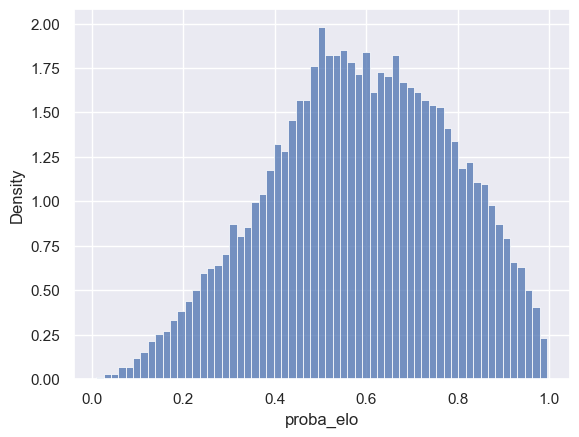

In [52]:
fig, ax = plt.subplots()
sns.histplot(df['proba_elo'], ax=ax, stat='density')

In [53]:
winners_losers = pd.concat([df['Winner'], df['Loser']], axis=0)

In [54]:
winners_losers

0           Dosedel S.
1            Kiefer N.
2            Gaudio G.
3        El Aynaoui Y.
4         Cherkasov A.
             ...      
44703       Pouille L.
44704     Donaldson J.
44705      Zeballos H.
44706      Anderson K.
44707         Jarry N.
Length: 89416, dtype: object

In [55]:
players = winners_losers.unique()

In [56]:
len(players) # nb joueurs uniques du dataset

1402

In [57]:
match_per_player = winners_losers.value_counts()

In [58]:
match_per_player[:10]

Federer R.      1160
Nadal R.         978
Ferrer D.        957
Djokovic N.      833
Berdych T.       805
Verdasco F.      793
Lopez F.         774
Youzhny M.       773
Davydenko N.     752
Robredo T.       734
dtype: int64

In [59]:
winners = df['Winner']

In [60]:
losers = df['Loser']

In [61]:
winners.value_counts()

Federer R.        970
Nadal R.          803
Djokovic N.       687
Ferrer D.         632
Murray A.         560
                 ... 
Cruciat A.          1
De Heart R.         1
Jun W.S.            1
Qureshi A.U.H.      1
Clezar G.           1
Name: Winner, Length: 899, dtype: int64

In [62]:
losers.value_counts()[:10]

Lopez F.            369
Youzhny M.          345
Verdasco F.         339
Ferrer D.           325
Nieminen J.         308
Seppi A.            302
Davydenko N.        299
Garcia-Lopez G.     299
Robredo T.          296
Kohlschreiber P.    291
Name: Loser, dtype: int64

In [63]:
players = pd.DataFrame(players)

In [64]:
players.rename({0:'Name'}, axis=1)

,Name
0,Dosedel S.
1,Kiefer N.
2,Gaudio G.
3,El Aynaoui Y.
4,Cherkasov A.
...,...
1397,Andreev A.
1398,Korda S.
1399,Auger-Aliassime F.
1400,Gaston H.


In [65]:
nbgames_player = pd.DataFrame(match_per_player, index=match_per_player.index)

In [66]:
nbgames_player.rename({0:'Nb_games'}, axis=1, inplace=True)

In [67]:
nbgames_player['Name'] = nbgames_player.index

In [68]:
nbgames_player.reset_index(inplace=True)

In [69]:
nbgames_player.drop('index', axis=1, inplace=True)

In [70]:
nbgames_player = pd.DataFrame(nbgames_player, columns=['Name', 'Nb_games'])

In [71]:
nbgames_player

,Name,Nb_games
0,Federer R.,1160
1,Nadal R.,978
2,Ferrer D.,957
3,Djokovic N.,833
4,Berdych T.,805
...,...,...
1397,Brizzi A.,1
1398,O'Neal J.,1
1399,Piccari F.,1
1400,Kim K,1


In [72]:
Nb_wins = winners.value_counts()

In [73]:
Nb_wins

Federer R.        970
Nadal R.          803
Djokovic N.       687
Ferrer D.         632
Murray A.         560
                 ... 
Cruciat A.          1
De Heart R.         1
Jun W.S.            1
Qureshi A.U.H.      1
Clezar G.           1
Name: Winner, Length: 899, dtype: int64

In [74]:
Nb_wins = pd.DataFrame(Nb_wins).rename({'Winner':'Nb_wins'}, axis=1)

In [75]:
Nb_wins

,Nb_wins
Federer R.,970
Nadal R.,803
Djokovic N.,687
Ferrer D.,632
Murray A.,560
...,...
Cruciat A.,1
De Heart R.,1
Jun W.S.,1
Qureshi A.U.H.,1


In [76]:
Nb_defeats = losers.value_counts()

In [77]:
Nb_defeats = pd.DataFrame(Nb_defeats)

In [78]:
Nb_defeats.rename({'Loser':'Nb_defeats'}, axis=1, inplace=True)

In [79]:
Nb_defeats

,Nb_defeats
Lopez F.,369
Youzhny M.,345
Verdasco F.,339
Ferrer D.,325
Nieminen J.,308
...,...
Lejnieks K.,1
Ebelthite C.,1
Anderson A.,1
Hutchins R.,1


In [80]:
nbgames_player.set_index('Name', inplace=True)

In [81]:
nbgames_player

,Nb_games
Name,
Federer R.,1160
Nadal R.,978
Ferrer D.,957
Djokovic N.,833
Berdych T.,805
...,...
Brizzi A.,1
O'Neal J.,1
Piccari F.,1


In [82]:
players_stat = nbgames_player.join(Nb_wins).join(Nb_defeats)

In [83]:
players_stat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1402 entries, Federer R. to Seyboth Wild T.
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nb_games    1402 non-null   int64  
 1   Nb_wins     899 non-null    float64
 2   Nb_defeats  1400 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 76.1+ KB


In [84]:
players_stat.fillna(0, inplace=True)

In [85]:
players_stat

,Nb_games,Nb_wins,Nb_defeats
Name,,,
Federer R.,1160,970.0,190.0
Nadal R.,978,803.0,175.0
Ferrer D.,957,632.0,325.0
Djokovic N.,833,687.0,146.0
Berdych T.,805,524.0,281.0
...,...,...,...
Brizzi A.,1,0.0,1.0
O'Neal J.,1,0.0,1.0
Piccari F.,1,0.0,1.0


In [86]:
players_stat['Wrate'] = players_stat['Nb_wins']/players_stat['Nb_games']

In [87]:
players_stat['Lrate'] = players_stat['Nb_defeats']/players_stat['Nb_games']

In [88]:
players_stat.describe()

,Nb_games,Nb_wins,Nb_defeats,Wrate,Lrate
count,1402.000000,1402.000000,1402.000000,1402.000000,1402.000000
mean,63.777461,31.888730,31.888730,0.251183,0.748817
std,137.678599,83.387252,58.996756,0.221288,0.221288
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,0.000000,0.572841
50%,5.000000,1.000000,4.000000,0.272727,0.727273
75%,47.000000,18.000000,30.750000,0.427159,1.000000
max,1160.000000,970.000000,369.000000,1.000000,1.000000


In [89]:
top_players = players_stat[players_stat['Nb_games'] > 500].sort_values('Wrate', ascending=False).head(10)

In [90]:
players_stat[players_stat.index.str.contains('Tsonga')].index

Index(['Tsonga J.W.', 'Tsonga J.W. '], dtype='object', name='Name')

In [91]:
top_players

,Nb_games,Nb_wins,Nb_defeats,Wrate,Lrate
Name,,,,,
Federer R.,1160,970.0,190.0,0.836207,0.163793
Djokovic N.,833,687.0,146.0,0.824730,0.175270
Nadal R.,978,803.0,175.0,0.821063,0.178937
Murray A.,725,560.0,165.0,0.772414,0.227586
Roddick A.,718,538.0,180.0,0.749304,0.250696
Del Potro J.M.,510,359.0,151.0,0.703922,0.296078
Hewitt L.,607,424.0,183.0,0.698517,0.301483
Tsonga J.W.,546,374.0,172.0,0.684982,0.315018
Ferrer D.,957,632.0,325.0,0.660397,0.339603


<BarContainer object of 10 artists>

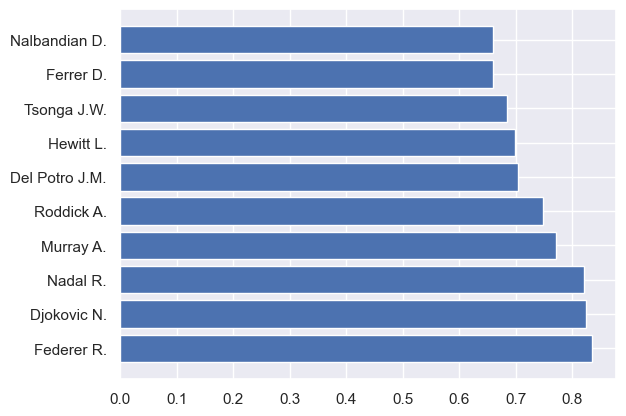

In [92]:
plt.barh(top_players.index, top_players['Wrate'])

In [93]:
df.Winner.mode()

0    Federer R.
Name: Winner, dtype: object

<AxesSubplot:>

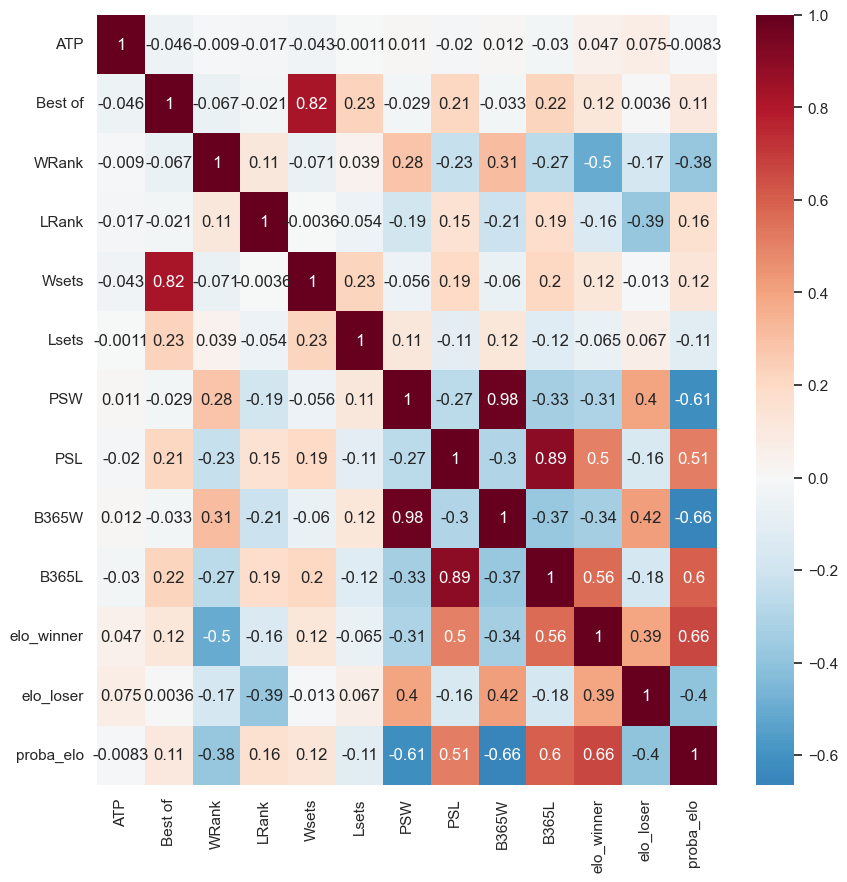

In [94]:
plt.figure(figsize = [10, 10])
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, center = 0, cmap = 'RdBu_r')

In [95]:
df_cotes = df.dropna()

In [96]:
df_cotes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32191 entries, 8678 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATP         32191 non-null  int64  
 1   Location    32191 non-null  object 
 2   Tournament  32191 non-null  object 
 3   Date        32191 non-null  object 
 4   Series      32191 non-null  object 
 5   Court       32191 non-null  object 
 6   Surface     32191 non-null  object 
 7   Round       32191 non-null  object 
 8   Best of     32191 non-null  int64  
 9   Winner      32191 non-null  object 
 10  Loser       32191 non-null  object 
 11  WRank       32191 non-null  int64  
 12  LRank       32191 non-null  int64  
 13  Wsets       32191 non-null  float64
 14  Lsets       32191 non-null  float64
 15  Comment     32191 non-null  object 
 16  PSW         32191 non-null  float64
 17  PSL         32191 non-null  float64
 18  B365W       32191 non-null  float64
 19  B365L       32191 non-

{'whiskers': [<matplotlib.lines.Line2D at 0x21887a52610>,
 'caps': [<matplotlib.lines.Line2D at 0x21887a52a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21887a52310>,
 'medians': [<matplotlib.lines.Line2D at 0x218878d1070>,
 'fliers': [<matplotlib.lines.Line2D at 0x218878d1340>,
 'means': []}

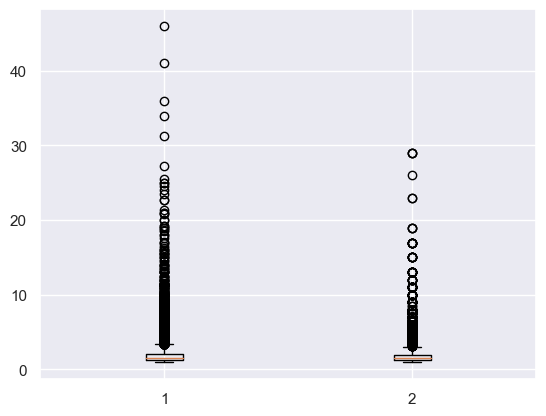

In [97]:
plt.boxplot([df_cotes['PSW'], df_cotes['B365W']])

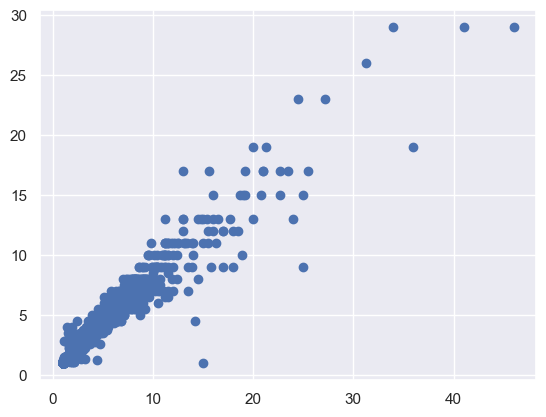

In [98]:
plt.scatter(df_cotes['PSW'], df_cotes['B365W'])

(0.0, 10.0)

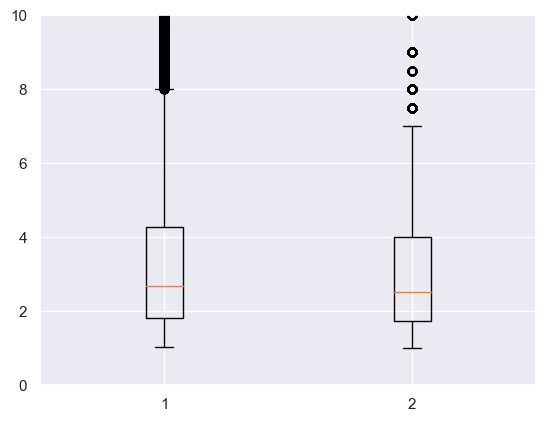

In [99]:
plt.boxplot([df_cotes['PSL'], df_cotes['B365L']])
plt.ylim([0,10])

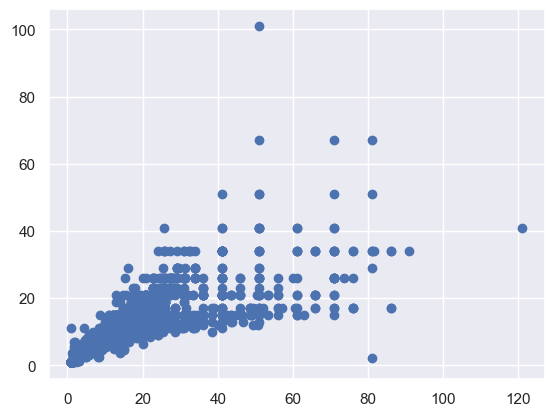

In [100]:
plt.scatter(df_cotes['PSL'], df_cotes['B365L'])

In [101]:
df_cotes['prob_PSW'] = 1/df_cotes['PSW']

D:\TEMP\ipykernel_13876\825251265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cotes['prob_PSW'] = 1/df_cotes['PSW']


In [102]:
df_cotes['prob_PSL'] = 1/df_cotes['PSL']

D:\TEMP\ipykernel_13876\3872986669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cotes['prob_PSL'] = 1/df_cotes['PSL']


In [103]:
df_cotes['PSMargin'] = df_cotes['prob_PSW'] + df_cotes['prob_PSL'] - 1

D:\TEMP\ipykernel_13876\3076493028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cotes['PSMargin'] = df_cotes['prob_PSW'] + df_cotes['prob_PSL'] - 1


In [104]:
df_cotes.loc[:,'prob_B365W'] = 1/df_cotes['B365W']
df_cotes.loc[:,'prob_B365L'] = 1/df_cotes['B365L']
df_cotes.loc[:,'B365Margin'] = df_cotes['prob_B365W'] + df_cotes['prob_B365L'] - 1

D:\TEMP\ipykernel_13876\1720860401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cotes.loc[:,'prob_B365W'] = 1/df_cotes['B365W']
D:\TEMP\ipykernel_13876\1720860401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cotes.loc[:,'prob_B365L'] = 1/df_cotes['B365L']
D:\TEMP\ipykernel_13876\1720860401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [105]:
df_cotes

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,B365L,elo_winner,elo_loser,proba_elo,prob_PSW,prob_PSL,PSMargin,prob_B365W,prob_B365L,B365Margin
8678,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Ulihrach B.,...,1.615,1486.195239,1618.182210,0.318694,0.452489,0.581734,0.034222,0.454545,0.619195,0.073741
8679,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Youzhny M.,...,1.364,1615.057648,1820.759485,0.234313,0.307692,0.722022,0.029714,0.347826,0.733138,0.080964
8680,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Sargsian S.,...,2.250,1654.468551,1588.330984,0.594046,0.572738,0.458716,0.031453,0.636537,0.444444,0.080982
8682,2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Lisnard J.R.,...,2.250,1533.308961,1473.299803,0.585511,0.640205,0.387597,0.027802,0.636537,0.444444,0.080982
8683,2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Levy H.,...,2.250,1401.283125,1418.621881,0.475068,0.609385,0.423729,0.033113,0.636943,0.444444,0.081387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44703,17,Dubai,Dubai Tennis Championships,2018-03-03,ATP500,Outdoor,Hard,The Final,3,Bautista Agut R.,...,2.200,1835.901543,1842.459807,0.490563,0.606061,0.411523,0.017583,0.602410,0.454545,0.056955
44704,16,Acapulco,Abierto Mexicano,2018-03-03,ATP500,Outdoor,Hard,Semifinals,3,Anderson K.,...,3.500,1843.576914,1647.967561,0.755103,0.746269,0.275482,0.021751,0.769231,0.285714,0.054945
44705,18,Sao Paulo,Brasil Open,2018-03-03,ATP250,Indoor,Clay,Semifinals,3,Jarry N.,...,1.900,1588.293069,1619.758421,0.454841,0.540541,0.478469,0.019009,0.526316,0.526316,0.052632
44706,16,Acapulco,Abierto Mexicano,2018-03-04,ATP500,Outdoor,Hard,The Final,3,Del Potro J.M.,...,2.620,1966.532849,1851.413609,0.659862,0.657895,0.363636,0.021531,0.666667,0.381679,0.048346


(0.0, 0.1)

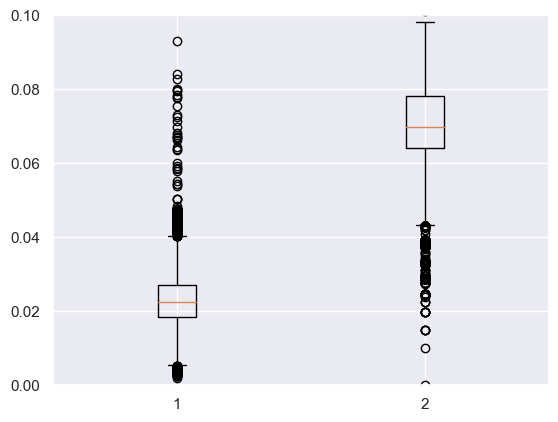

In [106]:
plt.boxplot([df_cotes['PSMargin'], df_cotes['B365Margin']])
plt.ylim([0,0.1])

(0.0, 0.1)

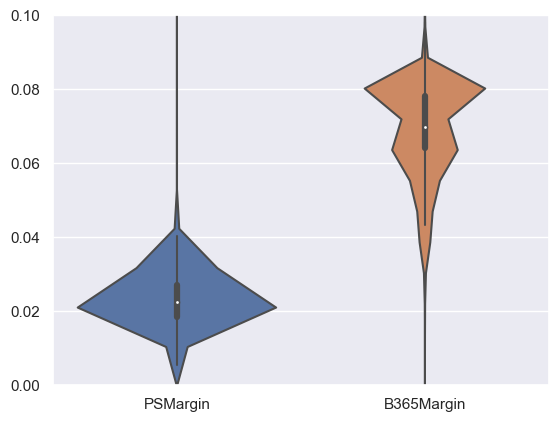

In [107]:
sns.violinplot(df_cotes[['PSMargin', 'B365Margin']])
plt.ylim([0,0.1])

<AxesSubplot:ylabel='count'>

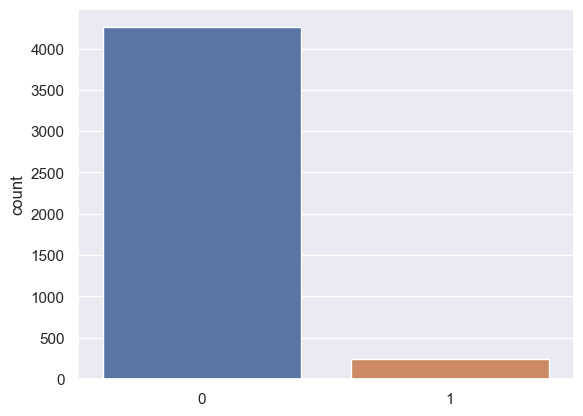

In [108]:
sns.countplot([df_cotes['PSMargin'].value_counts(),df_cotes['B365Margin'].value_counts()])

([<matplotlib.axis.XTick at 0x2188844c4c0>,
 [Text(0, 0, 'PS'), Text(1, 0, 'B365')])

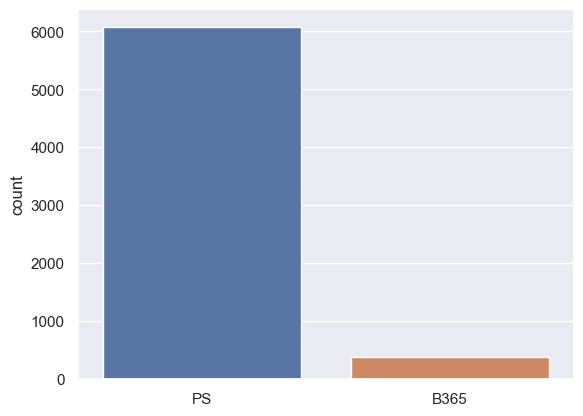

In [109]:
sns.countplot([(df_cotes['PSW'].astype('str') + df_cotes['PSL'].astype('str')).value_counts(),(df_cotes['B365W'].astype('str') + df_cotes['B365L'].astype('str')).value_counts()], label=['PS', 'B365'])
plt.xticks([0,1], ['PS', 'B365'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21888159340>,
 'caps': [<matplotlib.lines.Line2D at 0x218881598e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21888159070>,
 'medians': [<matplotlib.lines.Line2D at 0x21888159e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x21888149190>,
 'means': []}

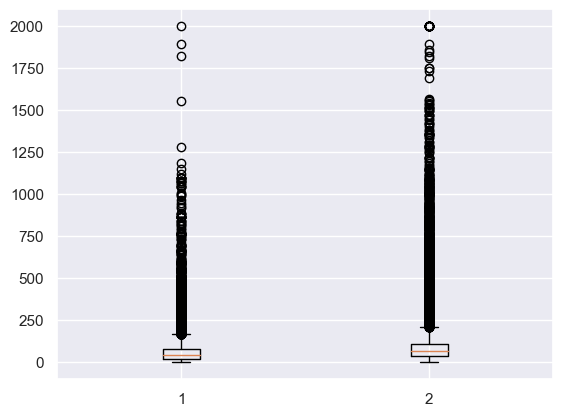

In [110]:
plt.boxplot([df['WRank'], df['LRank']])


(0.0, 250.0)

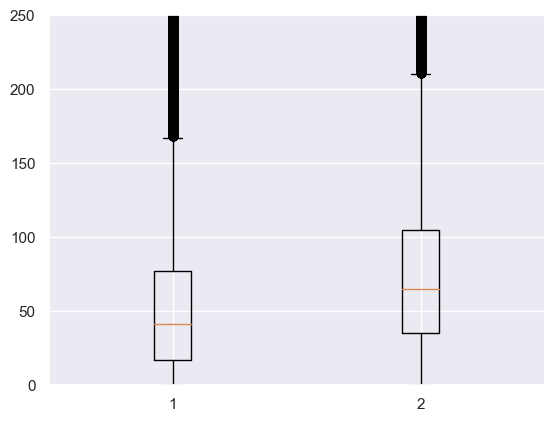

In [111]:
plt.boxplot([df['WRank'], df['LRank']])
plt.ylim([0,250])

{'whiskers': [<matplotlib.lines.Line2D at 0x21888304a60>,
 'caps': [<matplotlib.lines.Line2D at 0x21888584040>,
 'boxes': [<matplotlib.lines.Line2D at 0x21888304790>,
 'medians': [<matplotlib.lines.Line2D at 0x218885845e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x218885848b0>,
 'means': []}

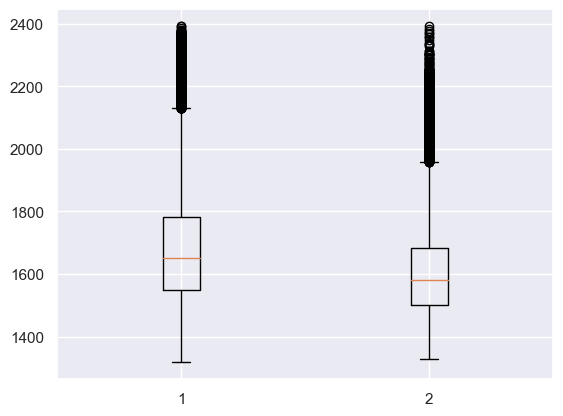

In [112]:
plt.boxplot([df['elo_winner'], df['elo_loser']])


In [113]:
(df['Winner'] + df['Loser']).value_counts()[:20]

Djokovic N.Nadal R.         24
Nadal R.Ferrer D.           23
Nadal R.Federer R.          22
Djokovic N.Berdych T.       21
Djokovic N.Murray A.        21
Nadal R.Djokovic N.         21
Djokovic N.Federer R.       20
Federer R.Roddick A.        20
Federer R.Davydenko N.      18
Federer R.Youzhny M.        18
Federer R.Wawrinka S.       18
Federer R.Djokovic N.       18
Nadal R.Berdych T.          17
Federer R.Hewitt L.         17
Federer R.Del Potro J.M.    17
Federer R.Berdych T.        17
Nadal R.Verdasco F.         16
Nadal R.Wawrinka S.         16
Federer R.Soderling R.      16
Djokovic N.Wawrinka S.      16
dtype: int64

In [115]:
from scipy.stats import pearsonr

pearsonr(df_cotes['PSL'], df_cotes['B365L'])

PearsonRResult(statistic=0.8925115117225058, pvalue=0.0)

In [117]:
table = pd.crosstab(df['ATP'], df['Location'])

In [120]:
from scipy.stats import chi2_contingency
import numpy as np
def V_Cramer(tab, n):
    stat_chi2 = chi2_contingency(tab)[0]
    k = tab.shape[0]
    r = tab.shape[1]
    k_tild = k - (k - 1)**2/(n - 1)
    r_tild = r - (r - 1)**2/(n - 1)
    phi2 = max(0, stat_chi2/n - (k - 1)*(r - 1)/(n - 1))
    return np.sqrt(phi2/min(k_tild - 1, r_tild - 1))

print(V_Cramer(table, df.shape[0]))

0.6422850646361539


In [121]:
# Detection de la cote du gagnant > à la cote du perdant

In [128]:
# PS
PSW_greater = df_cotes[df_cotes['PSW'] > df_cotes['PSL']]
PSW_greater_rate = len(PSW_greater)/len(df_cotes)
print(PSW_greater_rate)

0.2939952160541766


In [129]:
# B365
B365W_greater = df_cotes[df_cotes['B365W'] > df_cotes['B365L']]
B365W_greater_rate = len(B365W_greater)/len(df_cotes)
print(B365W_greater_rate)

0.2861669410704855


In [130]:
#test de corrélation ATP-Winner
table_ATPW = pd.crosstab(df['ATP'], df['Winner'])
print(V_Cramer(table_ATPW, df.shape[0]))

0.14609621139249387


In [131]:
#test de corrélation Location-Winner
table_LocationW = pd.crosstab(df['Location'], df['Winner'])
print(V_Cramer(table_LocationW, df.shape[0]))

0.19766789972060442


In [132]:
#test de corrélation Tournament-Winner
table_TournamentW = pd.crosstab(df['Tournament'], df['Winner'])
print(V_Cramer(table_TournamentW, df.shape[0]))

0.18028007375260174


In [133]:
#test de corrélation Series-Winner
table_SeriesW = pd.crosstab(df['Series'], df['Winner'])
print(V_Cramer(table_SeriesW, df.shape[0]))

0.2938900787307353


In [134]:
#test de corrélation Court-Winner
table_CourtW = pd.crosstab(df['Court'], df['Winner'])
print(V_Cramer(table_CourtW, df.shape[0]))

0.23031124449119728


In [135]:
#test de corrélation Surface-Winner
table_SurfaceW = pd.crosstab(df['Surface'], df['Winner'])
print(V_Cramer(table_SurfaceW, df.shape[0]))

0.2971240345984986


In [136]:
#test de corrélation Round-Winner
table_RoundW = pd.crosstab(df['Round'], df['Winner'])
print(V_Cramer(table_RoundW, df.shape[0]))

0.10478810534524718


In [137]:
#test de corrélation Loser-Winner
table_LoserW = pd.crosstab(df['Loser'], df['Winner'])
print(V_Cramer(table_LoserW, df.shape[0]))

0.2502603492342508


In [138]:
from datapackage import Package

package = Package('https://datahub.io/sports-data/atp-world-tour-tennis-data/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

ModuleNotFoundError: No module named 'datapackage'